*(С) Андрей Кулинич, 2019 год*

Данный пример демонстрирует базовые техники анализа и исследований для подготовки принятия управленческих решений. Ниже предложенна стройная и логичная схема анализа, которая будет одинаково хорошо работать в разных ситуациях. Фактически, заменив пример своими данными, вы можете выполнить аналогичный анализ. 

# Введение

Данный кейс рассматривает актуальную проблему оценки эффективности инвестиций в продвижение. А именно, влияние инвестиций в продвижения на продажи. 

Цели анализа сводились к трем пунктам:
1. Понять, стоит ли продолжать инвестировать в известность/доказать эффективность инвестиций в рост известности компании.
2. Понять в целом, как инвестиции в отдельные каналы влияют на результаты продаж.
3. Выделить ключевые метрики, которые являются наиболее значимыми с точки зрения влияния на продажи. 

Была выполненная непростая работа: из разных источников был собран датасет, который представлен вашему вниманию. Чаще всего, это и есть самый сложный этап. Данные были серьезным образом модифицированы, но сохранены наиболее важные закономерности. Также не будет раскрыта отрасль, к котрой относится данный пример. Это безусловно затрудняет трактовку результатов. С другой стороны, наглядно показывает, что в рамках даже глубокого статистического анализа важен специалист, который понимает истинный смысл процессов и выявленных закономерностей.  

В рамках кейса показаны техники, комментарии о результатах анализа озвучиваются в лекции, но не приведодятся в блокноте. Энтузиасты могут провести более глубокий и детальный анализ.

# Анализ: подготовка
Ниже загружаем часть необходимых библиотек.

In [2]:
#загружаем библиотеки
import pandas as pd
import numpy as np
from scipy.stats import variation
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

#инструкция для matplotlib выводить графики как картинки
%matplotlib inline

Читаем файл с датасетом.

In [3]:
df=pd.read_excel("UU_DataSet.xlsx", sheet_name="Marketing")

Выведем список колонок датасета и приведем ниже их описание.

In [4]:
df.columns

Index(['Дата', 'Продажи', 'Сезонность', 'Средняя цена', 'Акции', 'Наружка',
       'Промо', 'Интернет', 'PR', 'Публикации', 'Известность',
       'Рекламные контакты', 'Лояльность', 'Поиск', 'Конкурент 1',
       'Конкурент 2', 'Конкурент 3'],
      dtype='object')

Датасет представляет собой результаты деятельности компании за один год. Безусловно, хотелось бы иметь более значительный по объему датасет, но это не всегда возможно на практике. 

Ниже описание столбоцов датасета:
- 'Дата' - указывает на месяц/год к которому относятся данные
- 'Продажи' - результаты продаж в натуральных единицах
- 'Сезонность' - из исторических данных, насколько продажи в соответсвующем месяце превышают средние
- 'Средняя цена' - средняя цена в текущем месяце за единицу продукта компании
- 'Акции' - бинарное поле, показывает наличие (1) или отсутствие (0) акций (продажа по сниженным ценам) 
- 'Наружка' - сумма инвестиций в наружную рекламу: чаще всего щиты и вывески (рубли)
- 'Промо' - инвестиции в BTL, промо материалы (рубли)
- 'Интернет' - инвестиции в продвижение в интернет (все виды) (рубли)
- 'PR' - инвестиции в PR (рубли) 
- 'Публикации' - количество публикаций о компании и ее продуктах (интернет, пресса) в рамках PR активности 
- 'Известность' - результаты опросов об известности компании. Доля опрошенных, кто знает бренд компании (знание спонтанное и по подсказке)
- 'Рекламные контакты' - количество контактов по рекламе
- 'Лояльность' - процент повторных покупок
- 'Поиск' - количество запросов о компании и продукте в поисковых системах
- 'Конкурент 1', 'Конкурент 2', 'Конкурент 3' - количество запросов о компании о продуктах трех ближайших конкурентов.    

Выведем пять первых строк таблицы с данными.

In [6]:
df.head()

,Дата,Продажи,Сезонность,Средняя цена,Акции,Наружка,Промо,Интернет,PR,Публикации,Известность,Рекламные контакты,Лояльность,Поиск,Конкурент 1,Конкурент 2,Конкурент 3
0,2014-01-01,1536,1.127785,27,0,4703,0,1815,385,400,0.095,3994,0.612,22990,29189,37668,30553
1,2014-02-01,1512,1.146470,29,0,5791,0,1777,385,390,0.095,4549,0.618,23408,28187,38058,32758
2,2014-03-01,1329,1.015061,29,0,4861,0,1657,429,369,0.095,4362,0.579,22114,23901,35373,33611
3,2014-04-01,1086,0.879785,29,0,4375,0,3915,434,365,0.095,3884,0.597,19828,20162,32273,25431
4,2014-05-01,1036,0.760468,31,0,4229,0,3727,418,358,0.145,3680,0.547,18464,16600,31031,23200


Выведем последние пять строк таблицы с данными.

In [7]:
df.tail()

,Дата,Продажи,Сезонность,Средняя цена,Акции,Наружка,Промо,Интернет,PR,Публикации,Известность,Рекламные контакты,Лояльность,Поиск,Конкурент 1,Конкурент 2,Конкурент 3
7,2014-08-01,1937,1.054167,27,1,4843,103,5727,423,543,0.1450,6575,0.724,30434,25313,38010,33639
8,2014-09-01,1408,1.130470,29,0,3792,103,3849,423,474,0.1525,5863,0.545,30216,25744,38923,36255
9,2014-10-01,1112,1.153449,31,0,3368,56,4956,423,459,0.1525,5557,0.509,30688,29703,38503,37540
10,2014-11-01,1081,1.037076,30,0,3126,57,3631,423,508,0.1525,5066,0.667,27270,25371,34813,37511
11,2014-12-01,987,0.952227,32,0,3136,103,4813,423,559,0.1525,4625,0.655,23580,21714,32717,31438


Посмотрим на базовые статистики каждого из столбцов. Данные о максимумах и минимумах, стандартной ошибке и тд, можно  использовать для корректировки выбросов.

Стоит обратить внимание на нормальность распределения данных, в частности, насколько среднее отличается от медианы. не является ли распределение смещенным. Это может влиять на результаты анализа и применения некотрых моделей. В отдельных случаях, рекомендуется привести распределение к нормальной форме. В данном примере, чтобы избежать усложнения, мы этого делать не будем.

In [8]:
df.describe()

,Продажи,Сезонность,Средняя цена,Акции,Наружка,Промо,Интернет,PR,Публикации,Известность,Рекламные контакты,Лояльность,Поиск,Конкурент 1,Конкурент 2,Конкурент 3
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000
mean,1296.250000,1.000000,29.500000,0.083333,4228.166667,43.750000,3609.166667,381.250000,433.916667,0.130833,4731.833333,0.602333,24490.333333,24028.583333,35498.500000,31476.75000
std,284.642719,0.131429,1.566699,0.288675,850.642841,48.478908,1310.477140,113.937084,73.544616,0.026657,889.718325,0.066329,4177.246316,3985.299520,2712.903259,4680.74396
min,987.000000,0.760468,27.000000,0.000000,3126.000000,0.000000,1657.000000,24.000000,354.000000,0.095000,3680.000000,0.509000,18464.000000,16600.000000,31031.000000,23200.00000
25%,1079.250000,0.877887,29.000000,0.000000,3465.500000,0.000000,2846.250000,385.000000,368.000000,0.095000,3971.250000,0.546500,21989.000000,21414.750000,33325.250000,28453.75000
50%,1220.500000,1.026068,29.000000,0.000000,4302.000000,28.000000,3788.000000,423.000000,414.000000,0.145000,4587.000000,0.604500,23343.000000,24607.000000,35229.000000,32098.00000
75%,1470.750000,1.128456,31.000000,0.000000,4847.500000,103.000000,4393.000000,423.000000,482.500000,0.152500,5188.750000,0.656000,28006.500000,26354.750000,38022.000000,34293.00000
max,1937.000000,1.153449,32.000000,1.000000,5791.000000,103.000000,5727.000000,434.000000,559.000000,0.152500,6575.000000,0.724000,30688.000000,29703.000000,38923.000000,37540.00000


В даншем датасете нет пропусков (пустых ячеек), но на всякий случай, заменим потенциально имеющиеся пустые ячейки нулями. Это позволит минимизировать ошибки при анализе ваших собственных данных. 

In [9]:
df.fillna(0, inplace=True)

Построим гистограмму. Гистограмма быстро увидеть наличие выбросов и тип распределения данных. 
- df['Продажи'] - изменяя можно строить распределение для любого столбца.
- bins=5 - изменяя число, вы будете изменять число карманов гистограммы.

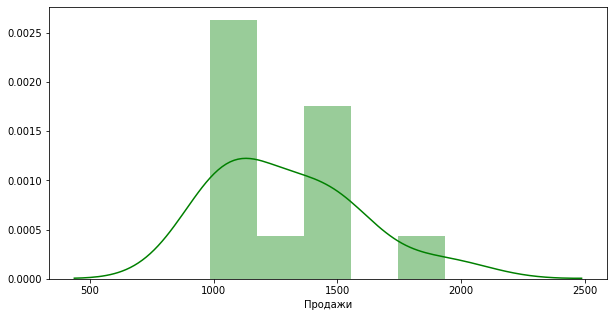

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df['Продажи'], color='g', hist_kws={'alpha':0.4}, bins=5)

Построим график продаж по месяцам.

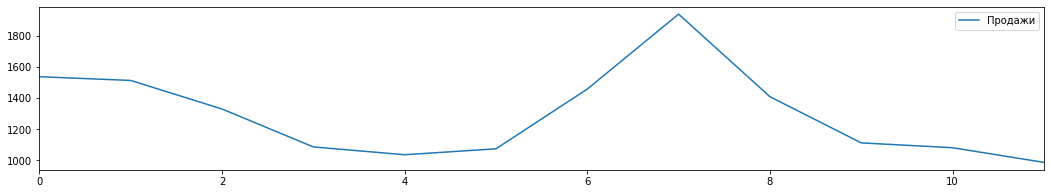

In [11]:
df[['Продажи']].plot(figsize=(18,3))

Посмотрим, как изменялась средняя стоимость по месяцам.

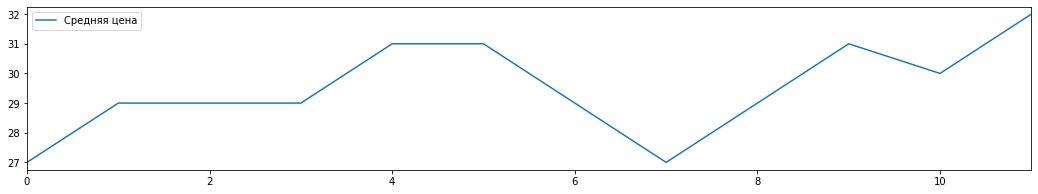

In [12]:
df[['Средняя цена']].plot(figsize=(18,3))

Можно отобразить две кривые на одном графике.

В некотрых случаях, их удобно привести из абсолютных значений в относительные. Для этого можно все значения разделить на максимальное или среднее значение ряда. Это позволит сделать данные более наглядными. 

<Figure size 432x288 with 0 Axes>

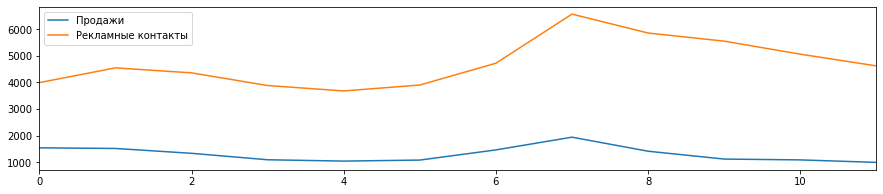

In [14]:
plt.figure()
df[['Продажи', 'Рекламные контакты']].plot(figsize=(15,3)); 
plt.legend();

Часто хочется увидеть сразу несколько зависимостей.

Построение этой диаграммы требует некоторого ресурса компьютера. Также, чтобы было нагляднее, указывайте ограниченное количество столбцов. В противном случае, вычисления могут занять некоторое время и графики будут слишком мелкими.

Список названий столбцов можно изменять: добавлять новые или удалять существующие. 

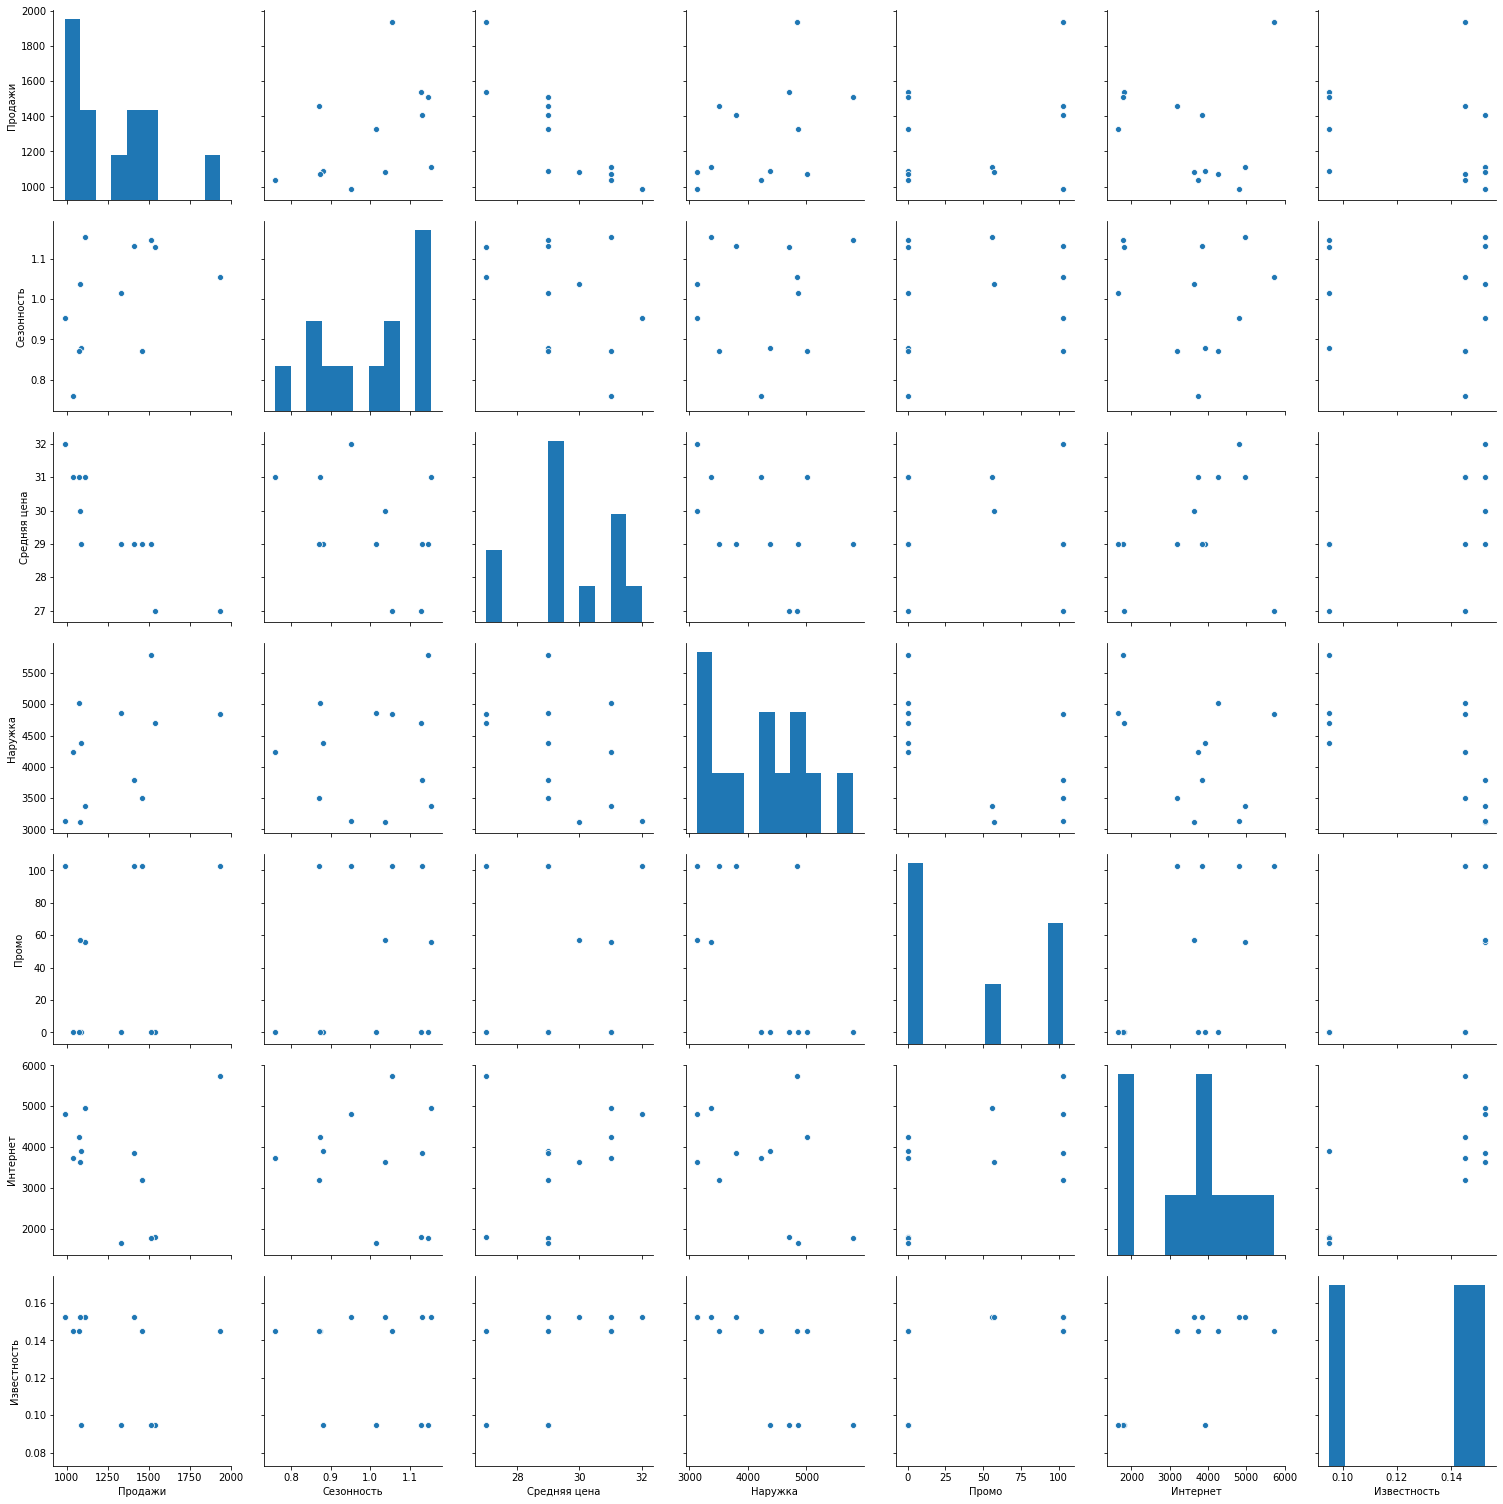

In [15]:
sns.pairplot(df[['Продажи', 'Сезонность', 'Средняя цена', 'Наружка', 'Промо', 'Интернет', 'Известность']],height=3)

На диаграммах рассеивания пар признаков, можно увидеть зависимости. Оценить наличие зависимостей количественно нам поможет рассчет парных корреляций. 

In [16]:
df.corr()

,Продажи,Сезонность,Средняя цена,Акции,Наружка,Промо,Интернет,PR,Публикации,Известность,Рекламные контакты,Лояльность,Поиск,Конкурент 1,Конкурент 2,Конкурент 3
Продажи,1.000000,0.451495,-0.863836,0.708902,0.460641,0.261048,-0.106296,-0.206920,0.201714,-0.220181,0.546700,0.516626,0.406099,0.414458,0.603970,0.194866
Сезонность,0.451495,1.000000,-0.396435,0.129791,0.106189,0.164098,-0.171114,0.278840,0.352332,-0.166217,0.564196,0.056930,0.713460,0.964213,0.909400,0.831989
Средняя цена,-0.863836,-0.396435,1.000000,-0.502519,-0.457103,0.011371,0.318938,0.122482,0.029587,0.500651,-0.280960,-0.446159,-0.197918,-0.381071,-0.473656,-0.073258
Акции,0.708902,0.129791,-0.502519,1.000000,0.227619,0.384887,0.508933,0.115396,0.467095,0.167360,0.652394,0.577653,0.448087,0.101495,0.291539,0.145475
Наружка,0.460641,0.106189,-0.457103,0.227619,1.000000,-0.617896,-0.439744,0.177631,-0.559314,-0.669705,-0.235948,-0.071883,-0.312680,0.145442,0.269689,-0.206893
Промо,0.261048,0.164098,0.011371,0.384887,-0.617896,1.000000,0.572849,-0.315645,0.848205,0.691502,0.758344,0.462158,0.668353,0.048547,0.173588,0.364401
Интернет,-0.106296,-0.171114,0.318938,0.508933,-0.439744,0.572849,1.000000,0.165392,0.580723,0.740952,0.517097,0.099402,0.450164,-0.183481,-0.063074,0.099056
PR,-0.206920,0.278840,0.122482,0.115396,0.177631,-0.315645,0.165392,1.000000,0.082314,-0.124141,0.056785,-0.243160,0.125254,0.224261,0.178919,0.331658
Публикации,0.201714,0.352332,0.029587,0.467095,-0.559314,0.848205,0.580723,0.082314,1.000000,0.582684,0.750401,0.589688,0.708393,0.257353,0.235202,0.561908
Известность,-0.220181,-0.166217,0.500651,0.167360,-0.669705,0.691502,0.740952,-0.124141,0.582684,1.000000,0.472588,-0.004285,0.477195,-0.186633,-0.058686,0.221472


Результаты можно представить более удобно в виде тепловой карты. Для этого потребуется несколько строк кода. 

На тепловой карте мы выведем только корреляции больше 0.3 и меньше -0.3.

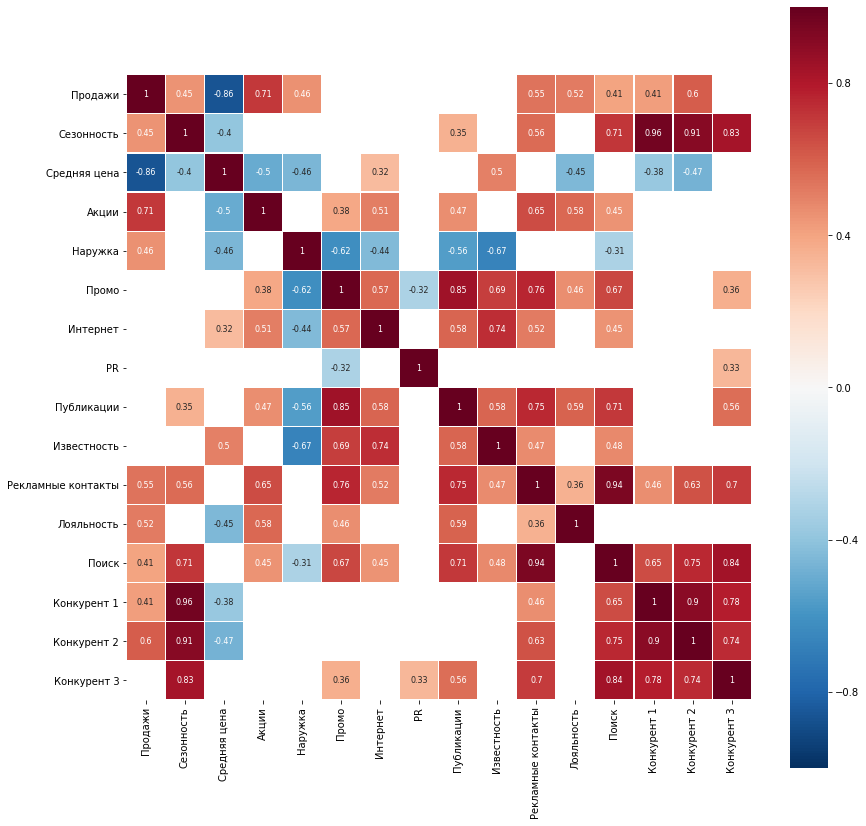

In [17]:
corr = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)],
            cmap="RdBu_r", vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Полезно для отбора признаков взглянуть на тепловую карту, но с учетом иерархической кластеризации признаков. Так, например, мы видим, что сезонность и количество поисковых запросов по "Конкуренту 1" попали в один корневой кластер. Или, также в один корневой кластер попали "Акции" и "Лояльность".

<Figure size 1008x1008 with 0 Axes>

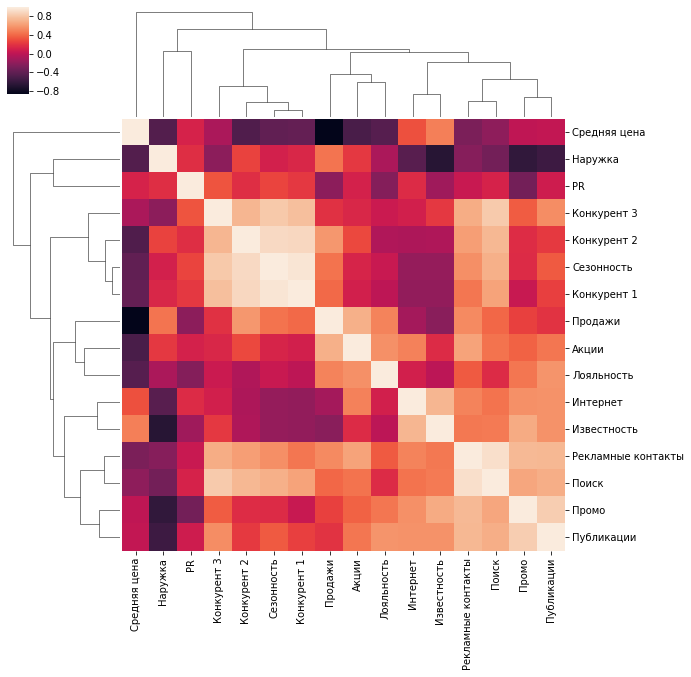

In [18]:
plt.figure(figsize=(14,14))
sns.clustermap(df.corr())

При отборе из большого числа признаков также часто стоит обращать внимание на вариацию зависимой переменной. Чемы выше вариация переменной, тем более сильное влияние, при наличии значимой корреляции, она может оказывать на целевую переменную.

Ниже, немного кода, исключительно для форматирования и более удобного представления результатов.

In [20]:
# обратите внимание, что должны быть только количественные переменные
cor=df.corr()
ar=[]
#print('Первое число коэффициент вариации, второе показатель корреляции')
for i in df.columns[2:]:
    #print(round(variation(df[i]),4), '\t', round(cor['Продажи'][i],4), '\t-<', i)
    ar.append([i, round(variation(df[i]),4), round(cor['Продажи'][i],4)])
df_cv=pd.DataFrame(ar, columns=['Признак', 'Вариация','Корреляция'])
df_cv

,Признак,Вариация,Корреляция
0,Сезонность,0.1258,0.4515
1,Средняя цена,0.0508,-0.8638
2,Акции,3.3166,0.7089
3,Наружка,0.1926,0.4606
4,Промо,1.0609,0.2610
5,Интернет,0.3476,-0.1063
6,PR,0.2861,-0.2069
7,Публикации,0.1623,0.2017
8,Известность,0.1951,-0.2202
9,Рекламные контакты,0.1800,0.5467


Некоторые зависимости можно изучить более детально. Изменяйте ниже значения названий осей (x, y). Вы будете получить не только диаграммы рассеивания, но и гистограммы по каждому из значений. 

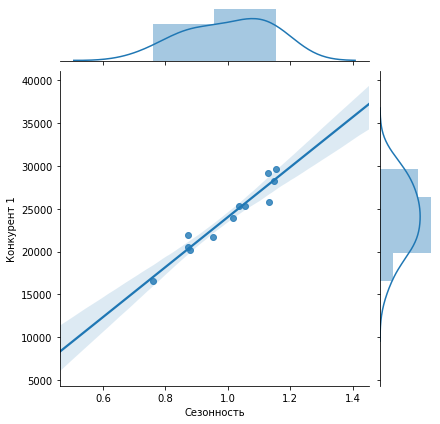

In [23]:
x='Сезонность'
y='Конкурент 1'
sns.jointplot(x=x, y=y, data=df, kind='reg');
# подпишем оси координат
plt.xlabel(x);
plt.ylabel(y);
plt.show();

# Отбор признаков

Для построении модели нам надо выделить самые важные признаки. Часть завиисмостей мы увидели изучая данные выше. Теперь используем более мощные эвристики для выделения ключевых факторов, которые влияют на результат. 

## Случайный лес (Random Forest)

Ансамблевые алгоритмы на основе деревьев решений, такие как случайный лес (random forest), позволяют оценить важность признаков.

Загрузим дополнительные библиотеки. 

In [24]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Будем использовать не все колонки. Так, например, нам не нужна колонка "Дата".

Также надо разделить признаки и целевую переменную "Продажи".

In [25]:
df.columns

Index(['Дата', 'Продажи', 'Сезонность', 'Средняя цена', 'Акции', 'Наружка',
       'Промо', 'Интернет', 'PR', 'Публикации', 'Известность',
       'Рекламные контакты', 'Лояльность', 'Поиск', 'Конкурент 1',
       'Конкурент 2', 'Конкурент 3'],
      dtype='object')

В переменной *col* будем хранить список признаков, влияние которых будем оценивать. 

In [27]:
col=['Сезонность', 'Средняя цена', 'Акции', 'Наружка',
       'Промо', 'Интернет', 'PR', 'Публикации', 'Известность',
       'Рекламные контакты', 'Лояльность', 'Поиск']

Y будет хранить целевое значение, X - таблицу с переменными, которые ее объясняют.

In [28]:
#Разделим на влияющие и целевую переменную
X=df[col]
Y=df['Продажи']
#создадим модель
model=RandomForestRegressor(n_estimators=100)
#натренируем модель
model.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Выведем упорядоченный по убыванию значимости список признаков. Сумма значимости признаков равна 1.

In [31]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.3319, 'Средняя цена'],
 [0.1939, 'Интернет'],
 [0.0913, 'Лояльность'],
 [0.0844, 'Рекламные контакты'],
 [0.0749, 'Сезонность'],
 [0.0614, 'Поиск'],
 [0.038, 'Акции'],
 [0.037, 'Публикации'],
 [0.0326, 'Наружка'],
 [0.0325, 'PR'],
 [0.0176, 'Промо'],
 [0.0044, 'Известность']]

Более наглядно оторбразить значимость на  гистограмме.

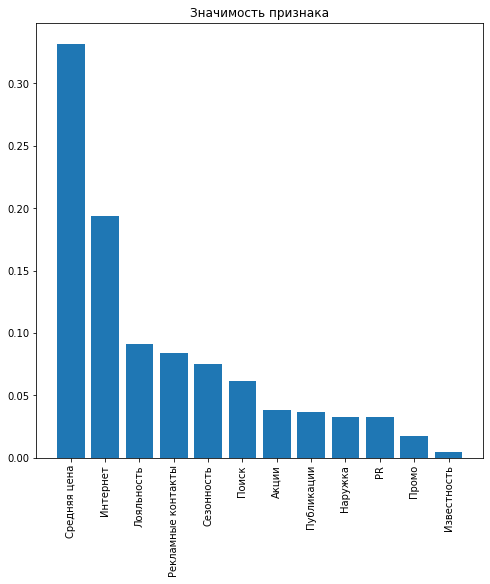

In [34]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

Точность модели модно оценить через метрику R2 (в идеале стремится к 1), а также посмотреть разброс фактических и предсказанных значений на диаграмме.

In [36]:
r2_score(model.predict(X), Y)

0.7213212361902976

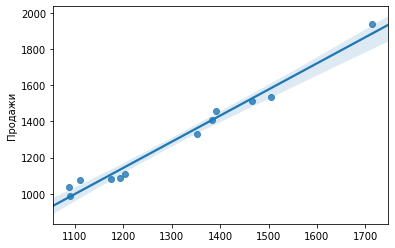

In [35]:
sns.regplot(model.predict(X), Y)

В целом, мы получили удовлетворительное качество модели. 

## Одномерный отбор признаков

Признаки, имеющие наиболее выраженную взаимосвязь с целевой переменной, могут быть отобраны с помощью статистических критериев. Библиотека scikit-learn содержит класс SelectKBest, реализующий одномерный отбор признаков (univariate feature selection). Этот класс можно применять совместно с различными статистическими критериями для отбора заданного количества признаков. В нашем случае, мы используем критерий chi2.

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
#разделяем на целевую и объясняющие переменные
X = df[col].values
Y = df['Продажи'].values

#создаем и тренируем модель
test = SelectKBest(score_func=chi2)
fit = test.fit(X, Y)

ar2=[]
for i in range(0, len(col)):
    ar2.append([col[i], round(fit.scores_[i],4)])
ar2.sort(key=lambda i: i[1], reverse=True)
df_om=pd.DataFrame(ar2, columns=['Признак', "Значимость"])
print('Значимость признаков в порядке убывания:')
df_om

Значимость признаков в порядке убывания:


,Признак,Значимость
0,Поиск,7837.5109
1,Интернет,5234.1317
2,Наружка,1882.5005
3,Рекламные контакты,1840.2139
4,Промо,590.9086
5,PR,374.5528
6,Публикации,137.1160
7,Акции,11.0000
8,Средняя цена,0.9153
9,Сезонность,0.1900


По результатам данного метода, мы получили несколько другой ранжир значимости критериев. Позже обобщим результаты.

## Рекурсивное исключение признаков

Метод рекурсивного исключения признаков (recursive feature elimination, RFE) реализует следующий алгоритм: модель обучается на исходном наборе признаков и оценивает их значимость, затем исключается один или несколько наименее значимых признаков, модель обучается на оставшихся признаках, и так далее, пока не останется заданное количество лучших признаков. В документации scikit-learn вы можете подробнее прочитать о классе RFE.

В примере ниже метод RFE применяется в сочетании с логистической регрессией для отбора 4-х лучших признаков. Для совместного использования с RFE можно выбирать различные модели, важно лишь, чтобы они были достаточно эффективны и совместимы с RFE.

*Количество отбираемых признаков можно изменить*

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [41]:
#создаем модель, которую будем обучать
model = LogisticRegression(solver='liblinear', multi_class='auto')

rfe = RFE(model, 4) # указано количество отбираемых признаков

#обучаем модель
fit = rfe.fit(X, Y)

#выводим результаты
ar3=[]
for i in range(0,len(col)):
    ar3.append([col[i], fit.support_[i], fit.ranking_[i]])
ar3.sort(key=lambda i: i[2])
df_rfe=pd.DataFrame(ar3, columns=["Признак", "Важный", "Рэнк"])
df_rfe

,Признак,Важный,Рэнк
0,Средняя цена,True,1
1,Промо,True,1
2,PR,True,1
3,Публикации,True,1
4,Рекламные контакты,False,2
5,Наружка,False,3
6,Интернет,False,4
7,Поиск,False,5
8,Сезонность,False,6
9,Известность,False,7


'True' - обозначает, что фактор по мнению модели важный. Далее рэнк факторов, которые модель оцнила как не важные. 

# Множественная регрессия

Задачей множественной линейной регрессии является построение линейной модели связи между набором непрерывных предикторов и непрерывной зависимой переменной. Обращайте внимание, что эта связь не всегда линейна. Тогда необходимо привести ее именно к лиенейной зависимости.

Также, к сожалению, при построении модели часто встречается эффект мультиколлинеарности. В статистике под мультиколлинеарностью понимают наличие высокой корреляция между входными переменными модели множественной линейной регрессии. Мультиколлинеарность вызывает неустойчивость работы модели, когда коэффициенты регрессии сильно меняются даже при незначительном изменении исходных данных и приводят к неадекватным выводам. По этой причине мы не сможем использовать все переменные, выберем только максимально независмые и значимые (по итогам отбора).

Ценность модели множественной регрессии в том, что она позволяет не только установить взаимосвязь целевой и объясняющей переменной, но и найти ее силу. 

In [42]:
import statsmodels.api as sm

pd.options.mode.chained_assignment = None

C:\Users\aikoo\AppData\Local\conda\conda\envs\my_root\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\aikoo\AppData\Local\conda\conda\envs\my_root\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                Продажи   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     7.806
Date:                Tue, 10 Dec 2019   Prob (F-statistic):              0.119
Time:                        13:19:58   Log-Likelihood:                -62.798
No. Observations:                  12   AIC:                             145.6
Df Residuals:                       2   BIC:                             150.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2721.6803   1260

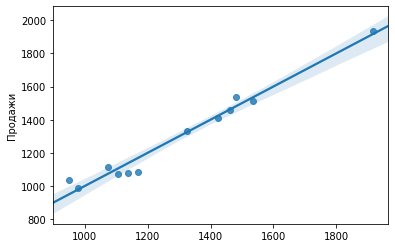

In [43]:
Y=df['Продажи']
X=df[['Сезонность','Поиск','Интернет', 'Наружка', 'Рекламные контакты',
        'Средняя цена','Промо','PR','Публикации']]
X=sm.add_constant(X)

reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
r=res.predict(X)
r=np.array(res)
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

Модель "обругала" нас за небольшое количество строк в датасете. Увы, что есть. 

Также модель получилась не адекватной. Так как P>|t| больше 0.05, а t для некоторых переменных не выходит за диапазон -2..+2. На эти две метрики обязательно надо обращать внимание для оценки адекватности и значимости модели. Именно они позволяют выявить и исключить переменные, которые с большой вероятностью не оказывают значимого влияния на целевую переменную. 

Ниже расшифровка части важной информации по итогам работы модели. Эти показатели позволяют оценить ее качество и адекватность. 

**AIC** - информационный критерий. Корректирует логарифмическую вероятность на основе количества наблюдений и сложности модели. Чем меньше значение, тем лучше.

**BIC** - информационный критерий.  Похож на AIC, но имеет более высокий штраф для моделей с большим количеством параметров. Чем меньше значение, тем лучше.

**Omnibus** - тест на асимметрию и эксцесс остатков. Мы надеемся увидеть значение, близкое к нулю, которое указывало бы на нормальность. **The Prob (Omnibus)** выполняет статистический тест, показывающий вероятность того, что остатки нормально распределены. Мы надеемся увидеть что-то близкое к 1 здесь. В случае если Omnibus относительно низок, а Prob (Omnibus) относительно высок, остатки в целом нормальны, но не идеальны. Подход с линейной регрессией, вероятно, будет лучше, чем случайное угадывание, но, вероятно, хуже нелинейных подходов.

**Skew** -  мера симметрии данных. Мы хотим видеть что-то близкое к нулю, что указывает, что остаточное распределение нормально.

**Kurtosis** - это мера «пиковости» или кривизны данных. Более высокие пики приводят к большему куртозу. Большой куртоз можно интерпретировать как более плотную кластеризацию остатков около нуля, что подразумевает лучшую модель с небольшим количеством выбросов (те чем больше, тем лучше).

**Cond. No.** - значения больше 20 вызывают подозрения в мультиколлинеарности. Чаще всего, сложно пройти данный тест. Чем меньше, тем лучше.

**R2** - насколько переменные хорошо объясняют разброс оценок. Максимальное занчение 1. Но при значениях более 0.9 надо крайне внимательно проверить на эффект мультиколлинеарности.

**Durbin-Watson** - тест на наличие автокореляции в остатках. В идеале значение должно стремиться к 2 (минимальное значение 0, максимальное 4). Значения меньше 0.8 однозначно указывают на циклические колебания в остатках. Эмпирически считается, что статистика лежит в нормальных пределах, если больше 1.5 и меньше 2.5. 

**Jarque-Bera (JB)** - Тест на нормальность остатков. Используется на больших наборах данных, более 2000. По своей сути аналогичен Omnibus.

Пойдем другим путем, напишем немного кода, который будет перебирать все варианты сочетания переменных для поиска наиболее точной модели. 

In [46]:
from itertools import compress, product
from statsmodels.stats.outliers_influence import variance_inflation_factor

#небольшая функция для построения набора комбинаций переменных
def combinations(items):
    return list( set(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) )

# колонки, которые показали свою значимость в процессе отбора критериев
# переменная spisCol хранит варианты комбинаций все переменных
spisCol=combinations(['Сезонность','Поиск','Интернет',
                    'Наружка', 'Рекламные контакты',
                     'Средняя цена','Промо','PR','Публикации'])

print('Количество комбинаций ', len(spisCol))

Количество комбинаций  512


Обратите внимание, если количество комбинаций велико (например, больше 64 000), время их перебора может быть крайне большим (слжность растет по экспоненте). В этом случае, уменьшайте количество переменных для перебора. 

По полученным комбинациям построим модели и отбросим варианты с явной мультиколинеарностью (будем использовать меру VIF).

In [47]:
#добавим константу в набор данных, нужна для рассчета регрессии
df=sm.add_constant(df)

#сохраним в этом списке данные лучших моделей
arr_res=[]

#пробежимся циклом по всем вариантам комбинаций
for c in spisCol:
    perem=list(c)
    flag=True
    
    if len(perem)==0: continue
        
    if not('const' in c):
        perem.append('const')
        
    # если больше одного клитерия, рассчитаем VIF    
    if len(perem)>1:
        vif = [variance_inflation_factor(df[perem].values, i) for i in range(df[perem].shape[1])]
    else:
        vif=[]
    
    #проверим список VIF, если хоть одна переменная больше 1000 (очень большое значение, на самом деле),
    #то в модели присутсвует мультиколлинераность
    for vv in vif:
        if vv>1000: 
            flag=False
        
    #посчитаем саму модель
    reg = sm.OLS(Y, df[perem])
    res=reg.fit()

    #отбросим нулевую гипотезу для всех регрессоров конкретной модели
    for val in res.tvalues:
        if val<2 and val>-2:
            flag=False
            break
    for val in res.pvalues:
        if val>0.05:
            flag=False
            break
    #если нулевую гипотезу отбросили и VIF в норме, сохраним результаты
    if flag:
        re=np.array(res.fittedvalues.copy())
        MSE=((np.array(Y)-re)**2).sum()/len(re)
            
        MAPE=(abs((np.array(Y)-re)/np.array(Y))).sum()/len(re)
        
        arr_res.append([round(MSE,4), res.rsquared, perem])

#отсортируем и выведем результаты
arr_res.sort()
df_model=pd.DataFrame(arr_res, columns=['MSE', 'r2', 'Переменные'])
print('Результаты перебора в порядке возрастания MSE:')
df_model

Результаты перебора в порядке возрастания MSE:


,MSE,r2,Переменные
0,3800.0079,0.948835,"[Промо, Наружка, Средняя цена, const]"
1,11396.9074,0.846547,"[Рекламные контакты, Средняя цена, const]"
2,18848.6806,0.746213,"[Средняя цена, const]"


Первая модель имеет очень высокий R2 и самую низкую величину среднеквадратической ошибки (MSE). Именно эту модель реализуем и оценим ее правдоподобность. 

Вы можете попробовать построить и сравнить между собой модели с другим набором регрессоров. 

                            OLS Regression Results                            
Dep. Variable:                Продажи   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     49.45
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.65e-05
Time:                        18:54:19   Log-Likelihood:                -66.484
No. Observations:                  12   AIC:                             141.0
Df Residuals:                       8   BIC:                             142.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Промо            3.5970      0.648      5.552   

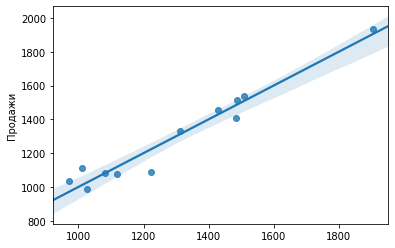

In [48]:
Y=df['Продажи']
#укажем пермеенные, которые будем использовать в качестве регрессоров
X=df[['Промо', 'Средняя цена', 'Наружка', 'const']]
reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

Модель в целом не идеальная, но позволяет луше понять основные причинно следственные связи в рекламном процессе. Так, если судить по модели, то три переменные на 94,9% объясняют вариации продаж. Где ключевой фактор продаж - снижение цены. Снижение цены на 1 тыс рублей увеличивает продажи 112 единиц (и наоборот). Каждая инвестированная в наружную рекламу тысяча приносит 0.1866 продаж. А факт проведения промо дает 3.59 продаж. Здесь, надо понимать, что факт проведения промо влияет (включен) в среднюю цену, что приводит к ухудшени качества модели. Одно, можно сказать однозначно, что не смотря на большие инвестиции в рекламу, чуть ли не основным фактором продаж является, если судить по математической модели, цена. 

Для того, чтобы поднять качество модели надо поработать над формированием новых признаков и увеличения датасета на регулярной основе. И это здорово само по себе, так как через статистический анализ компания начинает лучше понимать, какие действия и метрики являются ключевыми. Возможно, кто то не согласен с вываодами и готов собрать данные, чтобы доказать свою точку зрения. Поздравляю! Компания только что перешла на новый уровень управления и аргументации.

Продолжение следует...